# Visualize heatmaps of class activation for the VGG19 model

**Download the dataset**

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-21 23:16:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   117MB/s    in 0.6s    

2019-04-21 23:16:50 (117 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
!ls /tmp/cats_and_dogs_filtered

train  validation  vectorize.py


In [4]:
!ls /tmp/cats_and_dogs_filtered/train

cats  dogs


In [5]:
!ls /tmp/cats_and_dogs_filtered/validation

cats  dogs


In [6]:
!ls /tmp/cats_and_dogs_filtered/train/cats

cat.0.jpg    cat.250.jpg  cat.400.jpg  cat.551.jpg  cat.701.jpg  cat.852.jpg
cat.100.jpg  cat.251.jpg  cat.401.jpg  cat.552.jpg  cat.702.jpg  cat.853.jpg
cat.101.jpg  cat.252.jpg  cat.402.jpg  cat.553.jpg  cat.703.jpg  cat.854.jpg
cat.102.jpg  cat.253.jpg  cat.403.jpg  cat.554.jpg  cat.704.jpg  cat.855.jpg
cat.103.jpg  cat.254.jpg  cat.404.jpg  cat.555.jpg  cat.705.jpg  cat.856.jpg
cat.104.jpg  cat.255.jpg  cat.405.jpg  cat.556.jpg  cat.706.jpg  cat.857.jpg
cat.105.jpg  cat.256.jpg  cat.406.jpg  cat.557.jpg  cat.707.jpg  cat.858.jpg
cat.106.jpg  cat.257.jpg  cat.407.jpg  cat.558.jpg  cat.708.jpg  cat.859.jpg
cat.107.jpg  cat.258.jpg  cat.408.jpg  cat.559.jpg  cat.709.jpg  cat.85.jpg
cat.108.jpg  cat.259.jpg  cat.409.jpg  cat.55.jpg   cat.70.jpg	 cat.860.jpg
cat.109.jpg  cat.25.jpg   cat.40.jpg   cat.560.jpg  cat.710.jpg  cat.861.jpg
cat.10.jpg   cat.260.jpg  cat.410.jpg  cat.561.jpg  cat.711.jpg  cat.862.jpg
cat.110.jpg  cat.261.jpg  cat.411.jpg  cat.562.jpg  cat.712.jpg  cat.863.jpg
c

In [7]:
!ls /tmp/cats_and_dogs_filtered/validation/cats

cat.2000.jpg  cat.2100.jpg  cat.2200.jpg  cat.2300.jpg	cat.2400.jpg
cat.2001.jpg  cat.2101.jpg  cat.2201.jpg  cat.2301.jpg	cat.2401.jpg
cat.2002.jpg  cat.2102.jpg  cat.2202.jpg  cat.2302.jpg	cat.2402.jpg
cat.2003.jpg  cat.2103.jpg  cat.2203.jpg  cat.2303.jpg	cat.2403.jpg
cat.2004.jpg  cat.2104.jpg  cat.2204.jpg  cat.2304.jpg	cat.2404.jpg
cat.2005.jpg  cat.2105.jpg  cat.2205.jpg  cat.2305.jpg	cat.2405.jpg
cat.2006.jpg  cat.2106.jpg  cat.2206.jpg  cat.2306.jpg	cat.2406.jpg
cat.2007.jpg  cat.2107.jpg  cat.2207.jpg  cat.2307.jpg	cat.2407.jpg
cat.2008.jpg  cat.2108.jpg  cat.2208.jpg  cat.2308.jpg	cat.2408.jpg
cat.2009.jpg  cat.2109.jpg  cat.2209.jpg  cat.2309.jpg	cat.2409.jpg
cat.2010.jpg  cat.2110.jpg  cat.2210.jpg  cat.2310.jpg	cat.2410.jpg
cat.2011.jpg  cat.2111.jpg  cat.2211.jpg  cat.2311.jpg	cat.2411.jpg
cat.2012.jpg  cat.2112.jpg  cat.2212.jpg  cat.2312.jpg	cat.2412.jpg
cat.2013.jpg  cat.2113.jpg  cat.2213.jpg  cat.2313.jpg	cat.2413.jpg
cat.2014.jpg  cat.2114.jpg  cat.2214.jpg  cat.23

## 8 sample images of cats and dogs from the training and validation set

In [0]:
img_path1 = '/tmp/cats_and_dogs_filtered/train/cats/cat.250.jpg'
img_path2 = '/tmp/cats_and_dogs_filtered/train/cats/cat.300.jpg'
img_path3 = '/tmp/cats_and_dogs_filtered/train/dogs/dog.250.jpg'
img_path4 = '/tmp/cats_and_dogs_filtered/train/dogs/dog.300.jpg'
img_path5 = '/tmp/cats_and_dogs_filtered/validation/cats/cat.2100.jpg'
img_path6 = '/tmp/cats_and_dogs_filtered/validation/cats/cat.2200.jpg'
img_path7 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2100.jpg'
img_path8 = '/tmp/cats_and_dogs_filtered/validation/dogs/dog.2200.jpg'

In [9]:
from keras.applications import VGG19
# keep the densely connected classifier
model = VGG19(weights='imagenet') 

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
574717952/574710816 [==============================] - 6s 0us/step


**Last conv layer**

In [0]:
last_conv_layer = model.get_layer('block5_conv4')

In [0]:
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K

In [0]:
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, decode_predictions

In [0]:
def show_superimposed_image(img_path, heatmap):

  img = cv2.imread(img_path)
  # resize the heatmap to be the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  heatmap = np.uint8(255 * heatmap)

  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  superimposed_img = heatmap * 0.4 + img

  cv2_imshow(superimposed_img)

In [0]:
def process_image(img_path, idx=0):
  img = image.load_img(img_path, target_size=(224, 224))
  
  plt.imshow(img)
  plt.grid(None)
  plt.show()
  
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  preds = model.predict(x)
  print('Predicted:', decode_predictions(preds, top=3)[0])
  
  
  class_index = np.argsort(preds[0])[-(1+idx)]
  
  class_output = model.output[:, class_index]
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]

  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  pooled_grads_value, conv_layer_output_value = iterate([x])

  for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  plt.matshow(heatmap)
  plt.grid(None)
  plt.show()
  
  show_superimposed_image(img_path, heatmap)

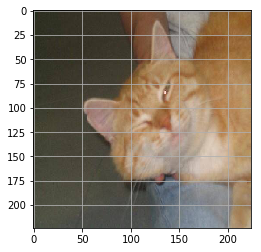

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02113023', 'Pembroke', 0.3392789), ('n02123159', 'tiger_cat', 0.18531084), ('n02085620', 'Chihuahua', 0.08475083)]


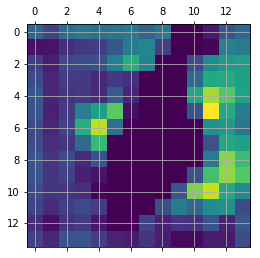

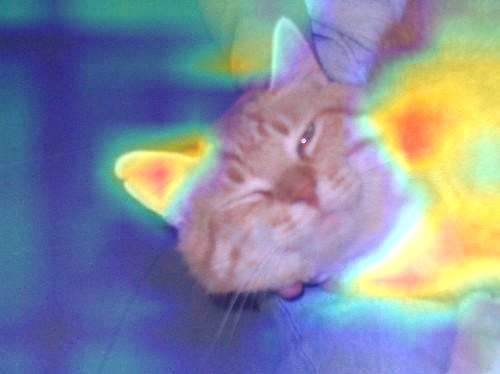

In [15]:
process_image(img_path1)

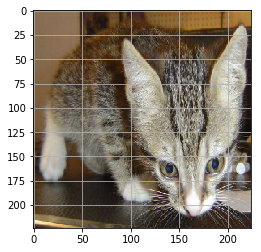

Predicted: [('n02123045', 'tabby', 0.45304176), ('n02124075', 'Egyptian_cat', 0.24013574), ('n02123159', 'tiger_cat', 0.2225351)]


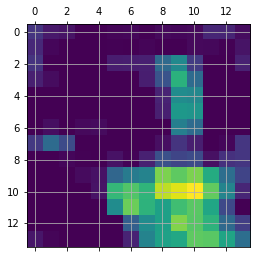

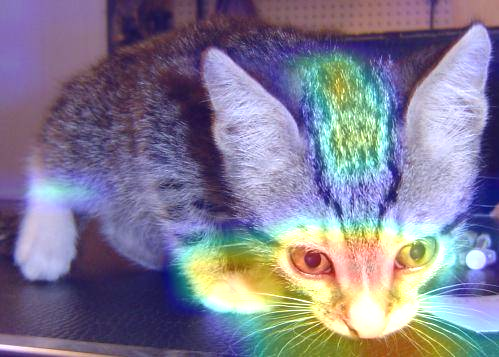

In [16]:
process_image(img_path2)

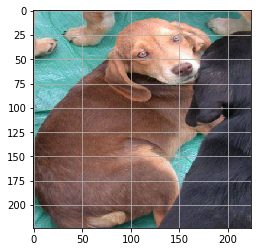

Predicted: [('n02088364', 'beagle', 0.14472853), ('n02099712', 'Labrador_retriever', 0.10758972), ('n02107142', 'Doberman', 0.09281557)]


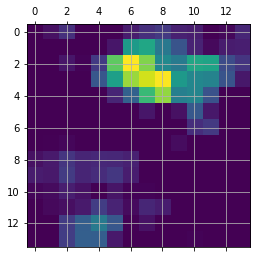

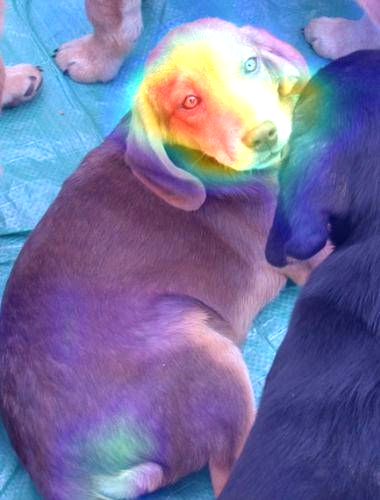

In [17]:
process_image(img_path3)

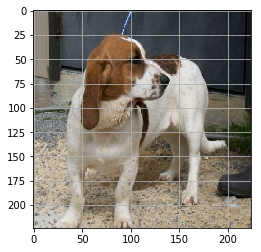

Predicted: [('n02088364', 'beagle', 0.2231196), ('n02089867', 'Walker_hound', 0.2217245), ('n02089973', 'English_foxhound', 0.116484806)]


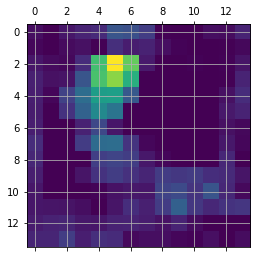

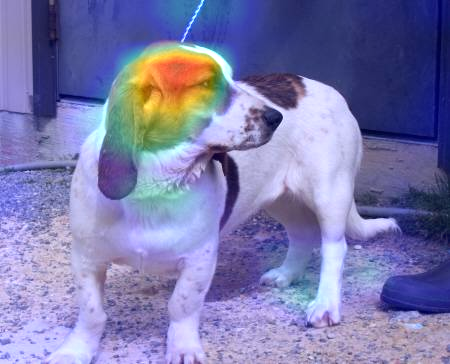

In [18]:
process_image(img_path4)

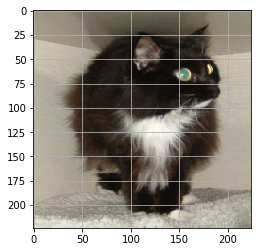

Predicted: [('n02123394', 'Persian_cat', 0.46609682), ('n04493381', 'tub', 0.12225917), ('n02808440', 'bathtub', 0.10439097)]


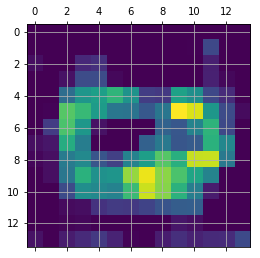

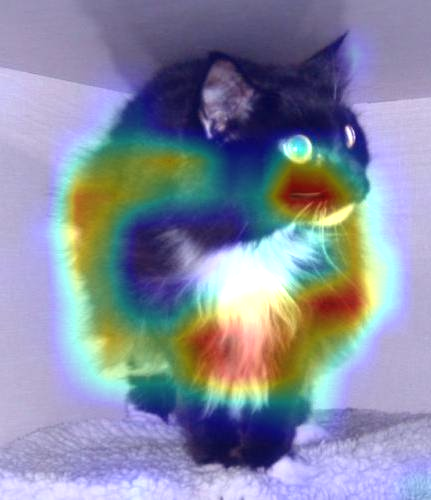

In [19]:
process_image(img_path5)

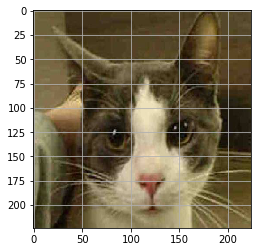

Predicted: [('n02124075', 'Egyptian_cat', 0.14185178), ('n02123045', 'tabby', 0.10533298), ('n03958227', 'plastic_bag', 0.080150224)]


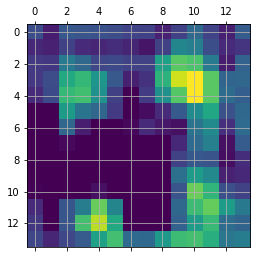

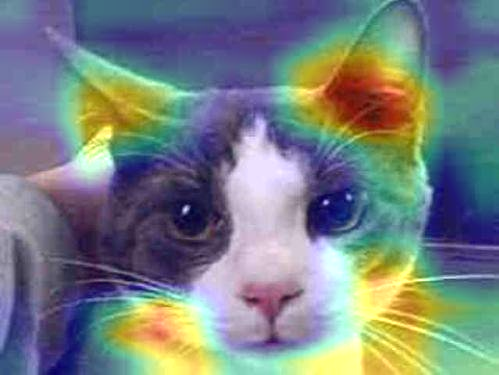

In [20]:
process_image(img_path6)

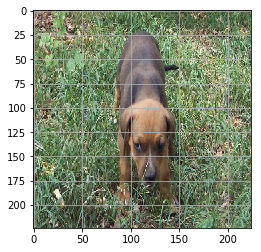

Predicted: [('n02090379', 'redbone', 0.4445885), ('n02088466', 'bloodhound', 0.2844566), ('n02087394', 'Rhodesian_ridgeback', 0.2016003)]


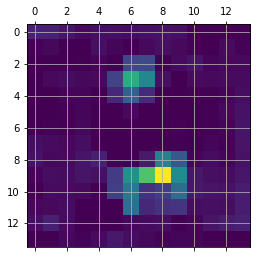

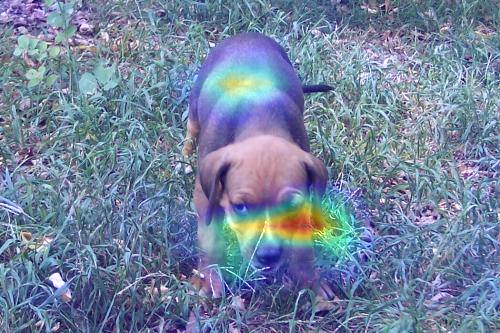

In [21]:
process_image(img_path7)

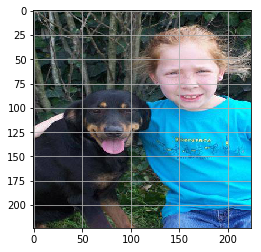

Predicted: [('n02106550', 'Rottweiler', 0.95203274), ('n02089078', 'black-and-tan_coonhound', 0.031757887), ('n02107142', 'Doberman', 0.0070886835)]


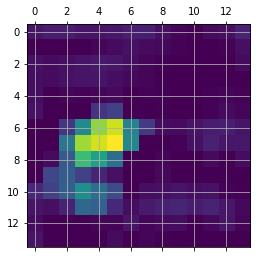

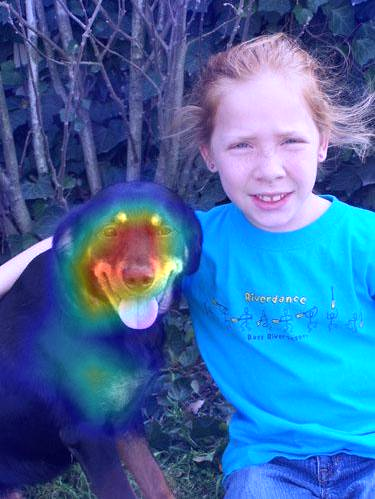

In [22]:
process_image(img_path8)